In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
from astropy.io import fits
from glob import glob

In [ ]:
datapath = '/lustre/aoc/projects/hera/jtan/uvsim/gsm_gc_point_source/lst.2457548.15h06m00s.21h11m50s.uvfits'
uvd = UVData()
uvd.read_uvfits(datapath)
uvd.set_lsts_from_time_array()

times = np.unique(uvd.time_array)[1000:]
num = 80
ts = times[::len(times)//num]
lsts = np.rad2deg(np.unique(uvd.lst_array)[1000::len(times)//num])

ValueError: not enough values to unpack (expected 2, got 0)

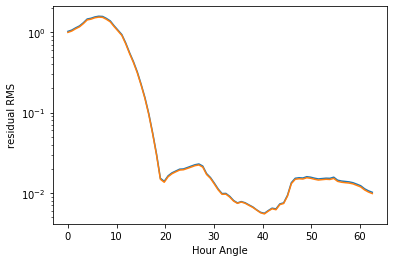

In [26]:
dirs = ['no_change', '3_planes', '9_planes']
resid=True
semilog=True

num = lambda s : float(s.split('/')[-1].split('_')[0])

s = "*deconvolved.residual.fits" if resid else "*deconvolved.image.fits"

for dr in dirs:
    impath = f'/lustre/aoc/projects/hera/aseidel/hour_angle_plot_masked/{dr}/'
    dct = {num(f):fits.open(f)[0].data[0][0] for f in glob(impath+s)}
    data = np.array([dct[x] for x in dct])

    t_to_ha = {t:(lst-800/3) for t,lst in zip(ts, lsts)}

    times, ims = zip(*sorted(dct.items()))
    
    fn,ylabel = (np.std,'residual RMS') if resid else (np.max,'source intensity')
    pltf = plt.semilogy if semilog else plt.plot 
    
    pltf([t_to_ha[t] for t in times], fn(np.array(ims), axis=(1,2)))
    plt.xlabel('Hour Angle')
    plt.ylabel(ylabel)